In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/swapn/Downloads/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#check if null values is present
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.shape  
#here we have 789 records and 9 features 

(768, 9)

In [7]:
df.size

6912

In [8]:
df["Outcome"].value_counts(normalize=True)*100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [9]:
df.describe().T                                                   #here we get summary statistics

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: >

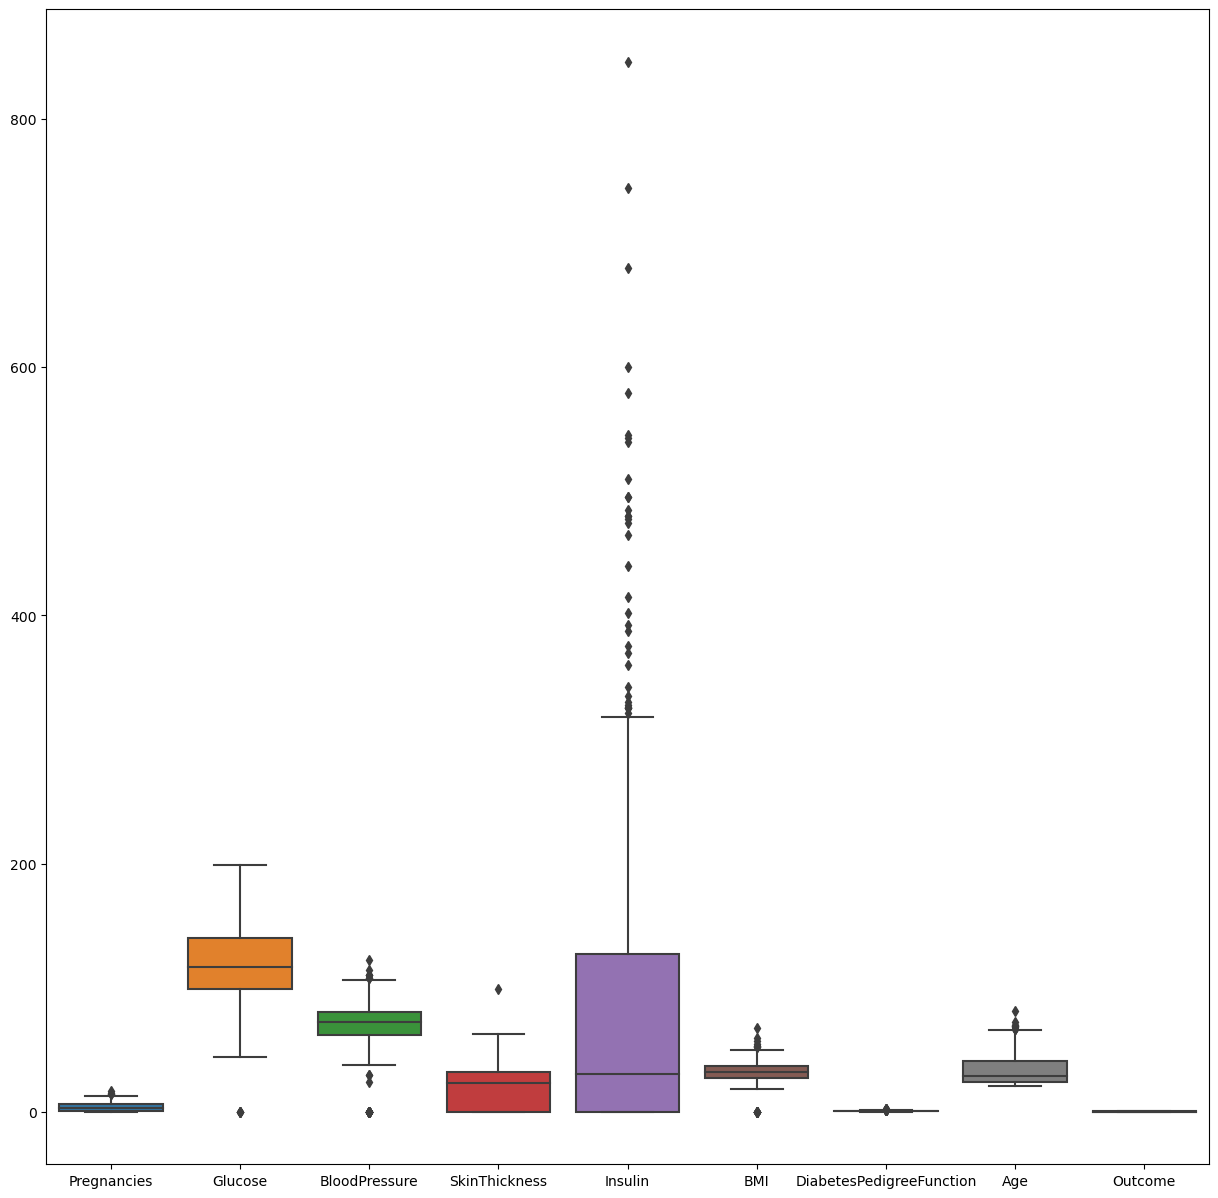

In [10]:
plt.figure(figsize=(15,15))
sns.boxplot(df)

In [11]:
Q1=df.quantile(q=0.25)
Q3=df.quantile(q=0.75)
IQR=Q3-Q1

In [12]:
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)

In [13]:
upper

Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64

In [14]:
lower

Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

In [15]:
df1=df[~((df<lower)|(df>upper))]

<Axes: >

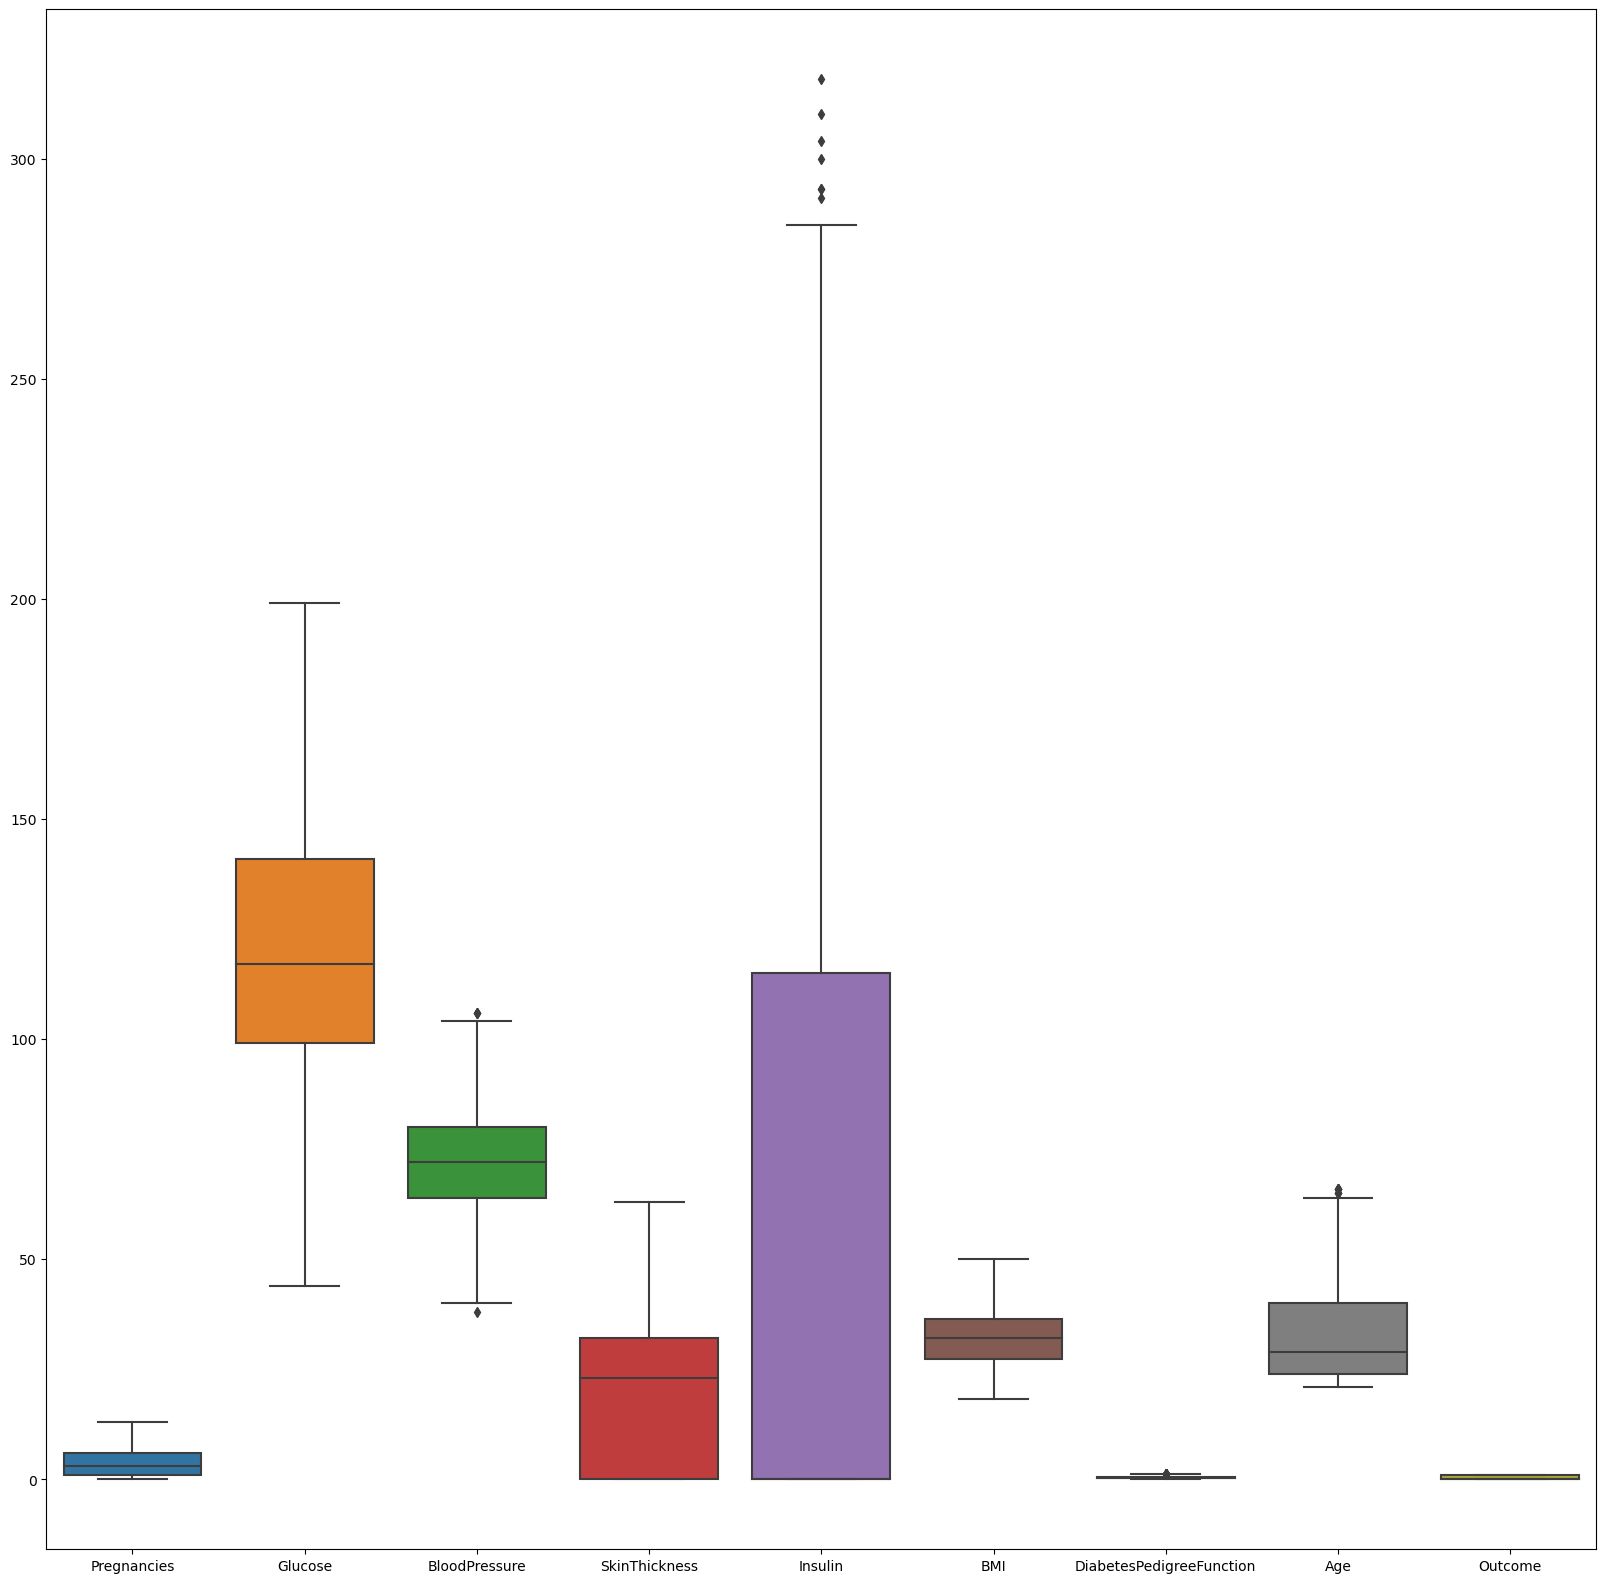

In [16]:
plt.figure(figsize=(20,20))
sns.boxplot(df1)

In [17]:
# so we have to cheak our data is balance or not 
diabetes_true_count=len(df1.loc[df1["Outcome"]==True])  # true=1
diabetes_false_count=len(df1.loc[df1["Outcome"]==False]) # false=0

In [18]:
(diabetes_true_count,diabetes_false_count)

(268, 500)

In [19]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.118977,0.217206,-0.095882,-0.109959,0.029692,0.002963,0.568371,0.205240
Glucose,0.118977,1.000000,0.210562,0.060451,0.211802,0.231552,0.088500,0.277996,0.494650
BloodPressure,0.217206,0.210562,1.000000,0.025924,-0.055677,0.285815,0.023382,0.336058,0.171064
SkinThickness,-0.095882,0.060451,0.025924,1.000000,0.500498,0.382929,0.160050,-0.107166,0.067136
Insulin,-0.109959,0.211802,-0.055677,0.500498,1.000000,0.183661,0.214691,-0.076668,0.088944
BMI,0.029692,0.231552,0.285815,0.382929,0.183661,1.000000,0.129065,0.076306,0.304902
DiabetesPedigreeFunction,0.002963,0.088500,0.023382,0.160050,0.214691,0.129065,1.000000,0.039420,0.160618
Age,0.568371,0.277996,0.336058,-0.107166,-0.076668,0.076306,0.039420,1.000000,0.266268
Outcome,0.205240,0.494650,0.171064,0.067136,0.088944,0.304902,0.160618,0.266268,1.000000


<Axes: >

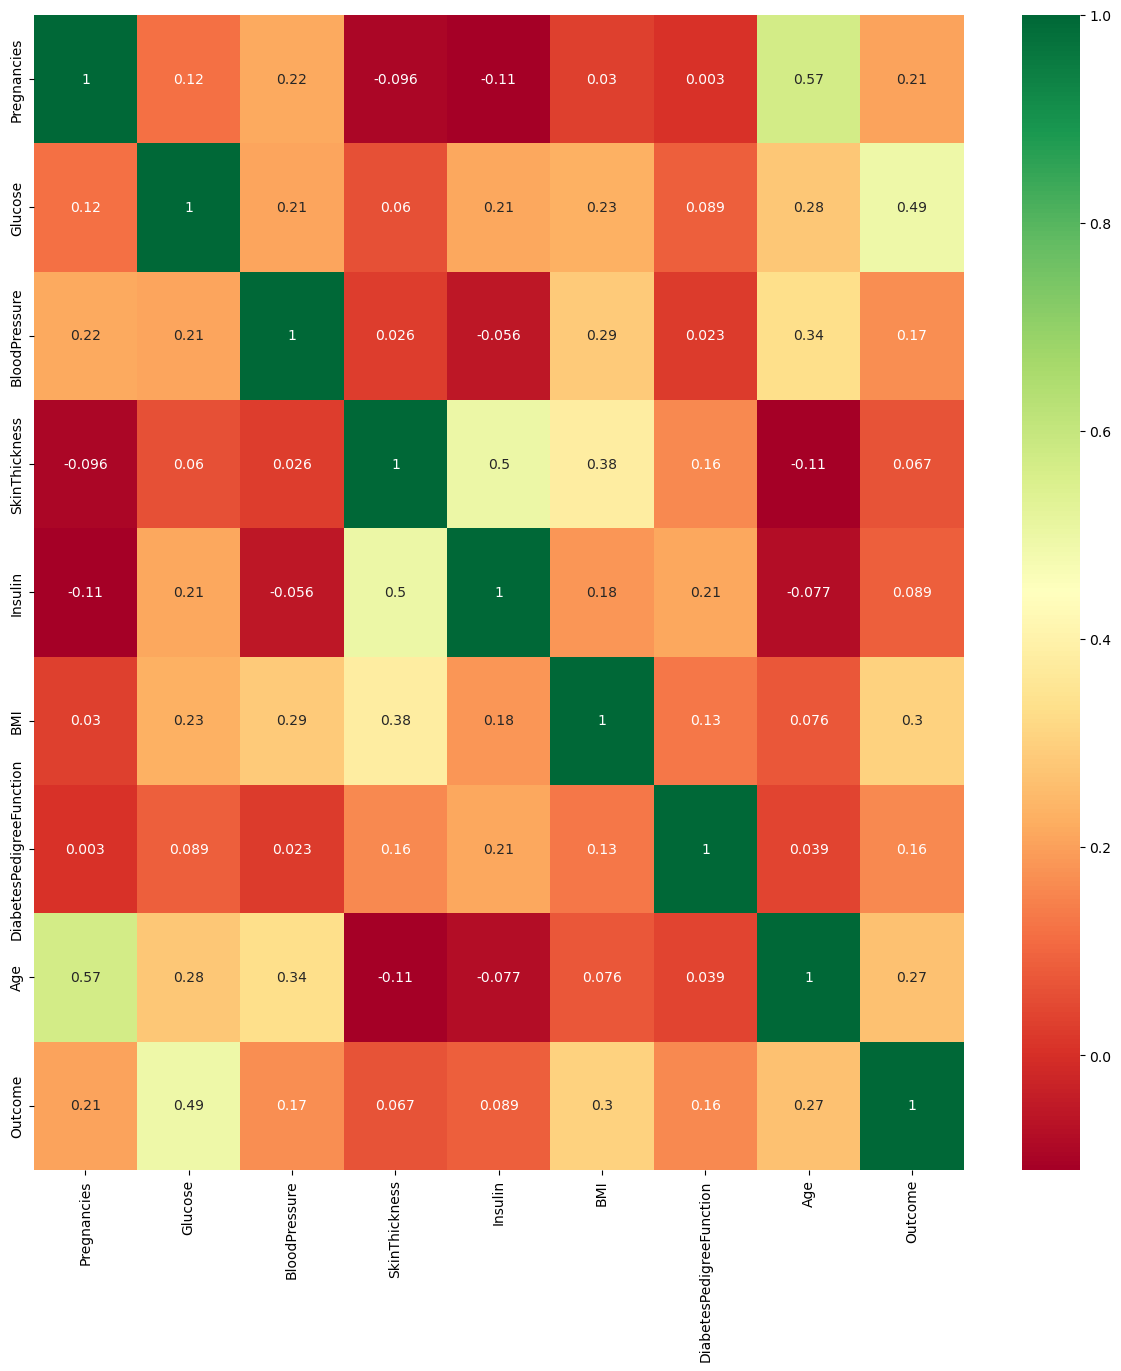

In [20]:
# correlation 
import matplotlib.pyplot as plt
import seaborn as sns

#get correlation of each features in dataset
corrmat=df1.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
#here we have to count number of 0 in colum

print("total number of rows :{0}".format(len(df1)))
print("number of rows missing Glucose:{0}".format(len(df1.loc[df1["Glucose"]==0])))
print("number of rows missing BloodPressure:{0}".format(len(df1.loc[df1["BloodPressure"]==0])))
print("number of rows missing SkinThickness:{0}".format(len(df1.loc[df1["SkinThickness"]==0])))
print("number of rows missing Insulin:{0}".format(len(df1.loc[df1["Insulin"]==0])))
print("number of rows missing BMI:{0}".format(len(df1.loc[df1["BMI"]==0])))
print("number of rows missing DiabetesPedigreeFunction:{0}".format(len(df1.loc[df1["DiabetesPedigreeFunction"]==0])))
print("number of rows missing Age:{0}".format(len(df1.loc[df1["Age"]==0])))

total number of rows :768
number of rows missing Glucose:0
number of rows missing BloodPressure:0
number of rows missing SkinThickness:227
number of rows missing Insulin:374
number of rows missing BMI:0
number of rows missing DiabetesPedigreeFunction:0
number of rows missing Age:0


In [22]:
#replace 0 with mean value
df["Glucose"].replace(0,df["Glucose"].mean(axis=0),inplace=True)
df["Insulin"].replace(0,df["Insulin"].mean(axis=0),inplace=True)
df["Glucose"].replace(0,df["BloodPressure"].mean(axis=0),inplace=True)
df["Insulin"].replace(0,df["BMI"].mean(axis=0),inplace=True)
df["Glucose"].replace(0,df["SkinThickness"].mean(axis=0),inplace=True)

In [23]:
# train test split
# spliting data into x and y

from sklearn.model_selection import train_test_split
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score

In [27]:
l=LogisticRegression()

In [28]:
l.fit(x_train,y_train)

C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_true,y_pred=y_test,l.predict(x_test)

In [30]:
l.score(x_train,y_train)*100

77.46741154562383

In [31]:
l.score(x_test,y_test)*100

78.78787878787878

In [32]:
accuracy_score(y_true,y_pred)*100

78.78787878787878

In [33]:
precision_score(y_true,y_pred)*100

78.125

In [34]:
recall_score(y_true,y_pred)*100

58.82352941176471

In [35]:
confusion_matrix(y_true,y_pred)*100

array([[13200,  1400],
       [ 3500,  5000]], dtype=int64)

In [36]:
f1_score(y_true,y_pred)*100

67.11409395973155

## svc

In [37]:
from sklearn.svm import SVC

In [38]:
sv=SVC(C=5.0,kernel='rbf')  #Radial basis function

In [39]:
sv.fit(x_train,y_train)

SVC(C=5.0)

In [40]:
y_true,y_pred=y_test,sv.predict(x_test)

In [41]:
sv.score(x_train,y_train)*100

77.6536312849162

In [42]:
l.score(x_test,y_test)*100

78.78787878787878

In [46]:
from sklearn.tree import DecisionTreeClassifier


In [47]:
dc=DecisionTreeClassifier()

In [48]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_true,y_pred=y_test,dc.predict(x_test)

In [50]:
dc.score(x_train,y_train)

1.0

In [51]:
dc.score(x_test,y_test)

0.6926406926406926

In [52]:
dc1=DecisionTreeClassifier()

In [53]:
dc1.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
dc1.score(x_train,y_train)

1.0

In [55]:
dc1.score(x_test,y_test)

0.7056277056277056

# bagging classifier

In [56]:
from sklearn.ensemble import BaggingClassifier

In [57]:
bc=BaggingClassifier(base_estimator=dc1,n_estimators=50,random_state=1)

In [58]:
bc.fit(x_train,y_train)

C:\Users\swapn\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=1)

In [59]:
bc.score(x_train,y_train)*100

99.81378026070763

In [60]:
bc.score(x_test,y_test)*100

77.92207792207793

## random forest classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf=RandomForestClassifier(n_estimators=20,random_state=1,max_features=12)

In [63]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_features=12, n_estimators=20, random_state=1)

In [64]:
rf.score(x_train,y_train)*100

99.4413407821229

In [65]:
rf.score(x_test,y_test)*100

75.32467532467533

# ada boost classifier

In [66]:
from sklearn.ensemble import AdaBoostClassifier

In [67]:
ad=AdaBoostClassifier()

In [68]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [69]:
ad.score(x_train,y_train)*100

82.68156424581005

In [70]:
ad.score(x_test,y_test)*100

79.65367965367966

# gradient boost classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
gbc=GradientBoostingClassifier()

In [73]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [74]:
gbc.score(x_train,y_train)*100

92.73743016759776

In [75]:
gbc.score(x_test,y_test)*100

79.65367965367966